## Машинное обучение, ВМК МГУ

## Практическое задание 2

### Общая информация
Дата выдачи: 9 октября 2019

Максимальная оценка: 10 баллов + 1 бонусный балл

Мягкий дедлайн: 23:59MSK 23 октября (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 30 октября.

### О задании

В этом задании вы:
- Познакомитесь с методом решения задачи регрессии на основе метода ближайших соседей.
- Реализуете алгоритм kNN для задачи регрессии.
- Изучите методы работы с категориальными и текстовыми переменными.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-02-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-02-ivanov.ipynb).

Далее отправьте этот файл на anytask в соответсвующий раздел.

In [1]:
import numpy as np
import pandas as pd

Все эксперименты в этой лабораторной работе предлагается проводить на данных соревнования New York City Airbnb Open Data: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data#AB_NYC_2019.csv

В данной задаче предлагается предсказать цену на съем квартиры в зависимости от её параметров.

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.shape

(48895, 16)

In [4]:
# число значений у признаков
for col_name in data.columns:
    print(col_name, len(data[col_name].unique()))

id 48895
name 47906
host_id 37457
host_name 11453
neighbourhood_group 5
neighbourhood 221
latitude 19048
longitude 14718
room_type 3
price 674
minimum_nights 109
number_of_reviews 394
last_review 1765
reviews_per_month 938
calculated_host_listings_count 47
availability_365 366


In [5]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Как видите, в данных есть пропуски. Не забудьте обработать их

In [6]:
# Ваш код здесь (ノ°∀°)ノ⌒･*:.｡. .｡.:*･゜ﾟ･*☆
data[["name", "host_name"]] = data[["name", "host_name"]].fillna("")
data.reviews_per_month = data.reviews_per_month.fillna(0)
data.last_review = data.last_review.fillna("2000-01-01")
data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Разобъем данные на обучение и контроль.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']), data[['price']],
                                                    test_size=0.3, random_state=241)

## Часть 1: Алгоритм kNN в задаче регрессии

<b> 1.1 (1.5 балла) </b>
Реализуйте класс `KNNRegressor`, который используя метод k ближайших соседей решает задачу регрессии. Для решение данной задачи, необходимо найти $N_k$ - k соседей, и после использовать значения их целевых переменных для предсказания:
\begin{align}
y = \frac{1}{k}\sum_{n \in N_k}w_n y_n,
\end{align}

где $w_n$ - вес каждого соседа. 

При этом `KNNRegressor` может работать в 2 режимах:
 - $uniform$ - ближайшие соседи учитываются с одинаковыми весами.
 - $distance$ - вес ближайших соседей зависит от расстояния
 
Сигнатуру методов при желании можно менять.

In [8]:
from typing import Union, Callable, Iterable, Optional
from sklearn.neighbors import NearestNeighbors
 

class KNNRegressor:
    def __init__(self, n_neighbors: int, metric: Union[str, Callable], mode: str = 'uniform'):
        """
        params:
            n_neighbors: number of neighbors
            metric: metric to use for distance computation
            mode: 'uniform' or 'distance'
            'uniform' - all points in each neighborhood are weighted equally
            'distance' - weight points by the inverse of their distance
        """
        self.__mode = mode
        self.__n_neighbors = n_neighbors
        self.__metric = metric
    
    def fit(self, X: np.array, y: np.array) -> None:
        """
            X: data
            y: labels
        """
        self.__y = y
        self.__X = X
        self.__l = len(X)
        
        self.__f = [] 
        ind, freq = np.unique(le_X_train[:, 0], return_counts=True)
        self.__f.append(dict(list(zip(ind, freq / float(self.__l)))))
        ind, freq = np.unique(le_X_train[:, 1], return_counts=True)
        self.__f.append(dict(list(zip(ind, freq / float(self.__l)))))
        ind, freq = np.unique(le_X_train[:, 2], return_counts=True)
        self.__f.append(dict(list(zip(ind, freq / float(self.__l)))))  
        
        self.__nn = NearestNeighbors(n_neighbors=self.__n_neighbors, metric=self.__metric, metric_params={'f': self.__f})
        self.__nn.fit(X)
        pass

    def predict(self, X: np.array, n_neighbors: Optional[int] = None) -> np.array:
        """
            X: data
            n_neighbors: number of neighbors
        """
        distances, indices = self.__nn.kneighbors(X, n_neighbors)
        if(self.__mode == "uniform"):
            return np.take(self.__y, indices).sum(axis=1) / n_neighbors
        elif(self.__mode == "distance"):
            return (np.take(self.__y, indices) * (1 / distances)).sum(axis=1) / n_neighbors
        pass

## Часть 2: Категориальные признаки

<b>2.1 (1 балл)</b>
Реализуйте три функции расстояния на категориальных признаках, которые обсуждались на [третьем семинаре](https://github.com/mmp-mmro-team/mmp_mmro_fall_2019/blob/master/lecture-notes/Sem03_knn.pdf). Не забудьте, что KNNRegressor должен уметь работать с этими функциями расстояния. Как вариант, можно реализовать метрики как [user-defined distance](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html).

In [9]:
def overlap(x, z, f):
    return (x != z).sum()
    pass

def flattened_overlap(x, z, f):
    mas_freq = []
    for d, n in zip(f, x):
        mas_val = np.array([x for x in d.values() if x <= d.get(n, 0)])
        mas_freq.append((mas_val ** 2).sum())
    mas_freq = np.array(mas_freq)
    return (x != z).sum() + ((x == z) * mas_freq).sum()
    pass

def log_overlap(x, z, f):
    mas_freq_x = []
    mas_freq_z = []
    for d, n_x, n_z in zip(f, x, z):
        mas_freq_x.append(d.get(n_x, 0))
        mas_freq_z.append(d.get(n_z, 0))
    mas_freq_x = np.log(mas_freq_x + 1)
    mas_freq_z = np.log(mas_freq_z + 1)
    return ((x != z) * mas_freq_x * mas_freq_z).sum()
    pass

<b>2.2 (1 балл)</b> Найдите все категориальные признаки в данных. Подсчитайте для каждой из метрик качество на тестовой выборке `X_test` при числе соседей $k = 10$. Качество измеряйте с помощью RMSE.

Какая функция расстояния оказалась лучшей? Почему?

In [10]:
# Ваш код здесь
from sklearn.preprocessing import LabelEncoder
le_X_train = X_train[["neighbourhood_group", "neighbourhood", "room_type"]]
le_X_test = X_test[["neighbourhood_group", "neighbourhood", "room_type"]]

le_neighbourhood_group = LabelEncoder()
le_neighbourhood = LabelEncoder()
le_room_type = LabelEncoder()

le_neighbourhood_group.fit(data.neighbourhood_group)
le_neighbourhood.fit(data.neighbourhood)
le_room_type.fit(data.room_type)

data.neighbourhood_group = le_neighbourhood_group.transform(data.neighbourhood_group)
data.neighbourhood = le_neighbourhood.transform(data.neighbourhood)
data.room_type = le_room_type.transform(data.room_type)

le_X_train.neighbourhood_group = le_neighbourhood_group.transform(le_X_train.neighbourhood_group)
le_X_train.neighbourhood = le_neighbourhood.transform(le_X_train.neighbourhood)
le_X_train.room_type = le_room_type.transform(le_X_train.room_type)

le_X_test.neighbourhood_group = le_neighbourhood_group.transform(le_X_test.neighbourhood_group)
le_X_test.neighbourhood = le_neighbourhood.transform(le_X_test.neighbourhood)
le_X_test.room_type = le_room_type.transform(le_X_test.room_type)

le_X_train = le_X_train.to_numpy()
le_X_test = le_X_test.to_numpy()
y_test = [x[0] for x in y_test.to_numpy()]
y_train = [x[0] for x in y_train.to_numpy()]

C:\Users\Lev\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
# print(le_X_train)
# print(le_X_test)
# print(y_test)
# print(y_train)

In [12]:
def RMSE(x, z):
    l = len(x)
    return np.sqrt(((x - z)**2).sum() / l)

In [13]:
# le_X_train_overlap, le_X_test_overlap, y_train_overlap = le_X_train, le_X_test, y_train
# class_overlap = KNNRegressor(10, overlap, "uniform")
# class_overlap.fit(le_X_train_overlap, y_train_overlap)
# y_predict = class_overlap.predict(le_X_test_overlap, 10)
# print(RMSE(y_predict, y_test))

Overlap
"Uniform": 217.1656726124964

In [ ]:
class_flattened_overlap = KNNRegressor(10, flattened_overlap, "uniform")
class_flattened_overlap.fit(le_X_train, y_train)
y_predict = class_flattened_overlap.predict(le_X_test, 10)
print(RMSE(y_predict, y_test))

flattened_overlap
"Uniform": 219.4005764208312‬

In [ ]:
class_log_overlap = KNNRegressor(10, log_overlap, "uniform")
class_log_overlap.fit(le_X_train, y_train)
y_predict = class_log_overlap.predict(le_X_test, 10)
print(RMSE(y_predict, y_test))

log_overlap
"Uniform": 220.7333952971305‬

<b>2.3 (1 балл) бонус</b> Подберите лучшее (на тестовой выборке) число соседей $k$ для каждой из функций расстояния. Какого удалось достичь уровня качества?

In [14]:
# Ваш код здесь

<b>2.4 (2.5 балла)</b> Отойдем ненадолго от задачи регрессии и перейдём к задаче классификации: будем определять, являеться ли квартира дорогой $(target = 1)$ или дешевой $(target = 0)$. Будем считать дорогими квариры, цена которых выше среднего.

In [15]:
data['target'] = (data.price > data.price.mean()).astype(int)

Реализуйте счетчики, которые заменят категориальные признаки на вещественные.

А именно, для каждого категориального признака $f_j(x)$ необходимо сделать следующее:
1. Число `counts` объектов в обучающей выборке с таким же значением признака.
\begin{align}
counts_j(c) = \sum_{i=1}^l [f_j(x_i) = c]
\end{align}
2. Число `successes` объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака.
\begin{align}
successes_j(c) = \sum_{i=1}^l[f_j(x_i) = c][y_i = +1].
\end{align}
3. Сглаженное отношение двух предыдущих величин:
\begin{align}
p_j(c) = \frac{successes_j(c) + a}{counts_j(c) + b},
\end{align}

где $a$ и $b$ - априорные счетчики (например, a = 1, b = 2).

In [16]:
def counters(x):
    """
    params:
        x: value on categorical feature for N objects
    returns: vector of length N
    """
    a = 1
    b = 2
    
    data_count = data.copy(deep=True)
    data_count["count"] = 1
    data_count_neighbourhood_group = data_count[["neighbourhood_group", "target", "count"]].groupby(['neighbourhood_group']).sum().to_numpy()
    data_count_neighbourhood = data_count[["neighbourhood", "target", "count"]].groupby(['neighbourhood']).sum().to_numpy()
    data_count_room_type = data_count[["room_type", "target", "count"]].groupby(['room_type']).sum().to_numpy()
    
    rezult = []
    
    #print(data_count_neighbourhood_group[:, 0])
    rezult.append((data_count_neighbourhood_group[:, 0] + a) / (data_count_neighbourhood_group[:, 1] + b))
    rezult.append((data_count_neighbourhood[:, 0] + a) / (data_count_neighbourhood[:, 1] + b))
    rezult.append((data_count_room_type[:, 0] + a) / (data_count_room_type[:, 1] + b))
    return rezult
#     for n, c in zip(["neighbourhood_group", "neighbourhood", "room_type"], rezult):
#         data_count[n] = [c[x] for x in data_count[n]]
    #data_count["neighbourhood_group"] 
    #print(rezult)
    pass

Поскольку признаки, содержащие информацию о целевой переменной, могут привести к переобучению, может оказаться полезным сделать *фолдинг*: разбить обучающую выборку на $n$ частей, и для $i$-й части считать `counts` и `successes` по всем остальным частям. Для тестовой выборки используются счетчики, посчитанный по всей обучающей выборке. Реализуйте и такой вариант. Достаточно взять $n = 3$.

In [17]:
from sklearn.model_selection import KFold 
def fold_counters(x):
    """
    params:
        x: value on categorical feature for N objects
    returns: vector of length N
    """
    kf = KFold(n_splits=3, random_state=42, shuffle=True)
    
    train_index, test_index = list(kf.split(x))[0]
    #print("TRAIN:", train_index) 
    #print("TEST:", test_index)
    X_train, X_test = x.loc[train_index], x.loc[test_index]
    
    transform = counters(X_train)
    
    for n, c in zip(["neighbourhood_group", "neighbourhood", "room_type"], transform):
        X_train[n] = [c[x] for x in X_train[n]]
        X_test[n] = [c[x] for x in X_test[n]]
    
    return X_train, X_test
    pass

def without_fold_counters(x):
    transform = counters(x)
    kf = KFold(n_splits=3, random_state=42, shuffle=True)
    train_index, test_index = list(kf.split(x))[0]
    X_train, X_test = x.loc[train_index], x.loc[test_index]
    for n, c in zip(["neighbourhood_group", "neighbourhood", "room_type"], transform):
        X_train[n] = [c[x] for x in X_train[n]]
        X_test[n] = [c[x] for x in X_test[n]]
    
    return X_train, X_test
    

Посчитайте на тесте AUC-ROC метода $k$ ближайших соседей с евклидовой метрикой для выборки, где категориальные признаки заменены на счетчики. Сравните по AUC-ROC два варианта формирования выборки — с фолдингом и без. Не забудьте подобрать наилучшее число соседей $k$.

In [18]:
X_train, X_test = fold_counters(data)
count_X_train = X_train[["neighbourhood_group", "neighbourhood", "room_type"]]
count_X_test = X_test[["neighbourhood_group", "neighbourhood", "room_type"]]
count_y_train = X_train["target"]
count_y_test = X_test["target"]

count_X_train = count_X_train.to_numpy()
count_X_test = count_X_test.to_numpy()
count_y_test = count_y_test.to_numpy()
count_y_train = count_y_train.to_numpy()

In [19]:
from sklearn.metrics import roc_auc_score

n_neighbors = 153
nn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
nn.fit(count_X_train)
distances, indices = nn.kneighbors(count_X_test, n_neighbors)
count_y_predict = np.rint(np.take(count_y_train, indices).sum(axis=1) / n_neighbors)
count_y_predict_regression = np.take(count_y_train, indices).sum(axis=1) / n_neighbors
print(n_neighbors, roc_auc_score(count_y_predict, count_y_test))
#print("RMSE", RMSE(count_y_predict_regression, count_y_test))

#for n_neighbors in range(1, 1000, 2):
    
#     nn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
#     nn.fit(count_X_train)
#     distances, indices = nn.kneighbors(count_X_test, n_neighbors)
#     #print(count_y_train)
#     count_y_predict = np.rint(np.take(count_y_train, indices).sum(axis=1) / n_neighbors)
#     #print(count_y_predict, count_y_test)
#     print(n_neighbors, roc_auc_score(count_y_predict, count_y_test))

153 0.7726047322493931


Fold: 153 0.7726047322493931

In [20]:
X_train, X_test = without_fold_counters(data)
count_X_train = X_train[["neighbourhood_group", "neighbourhood", "room_type"]]
count_X_test = X_test[["neighbourhood_group", "neighbourhood", "room_type"]]
count_y_train = X_train["target"]
count_y_test = X_test["target"]

count_X_train = count_X_train.to_numpy()
count_X_test = count_X_test.to_numpy()
count_y_test = count_y_test.to_numpy()
count_y_train = count_y_train.to_numpy()

In [21]:
from sklearn.metrics import roc_auc_score

n_neighbors = 161
nn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
nn.fit(count_X_train)
distances, indices = nn.kneighbors(count_X_test, n_neighbors)
count_y_predict = np.rint(np.take(count_y_train, indices).sum(axis=1) / n_neighbors)
print(n_neighbors, roc_auc_score(count_y_predict, count_y_test))

# for n_neighbors in range(1, 1000, 2):
    
#     nn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
#     nn.fit(count_X_train)
#     distances, indices = nn.kneighbors(count_X_test, n_neighbors)
#     #print(count_y_train)
#     count_y_predict = np.rint(np.take(count_y_train, indices).sum(axis=1) / n_neighbors)
#     #print(count_y_predict, count_y_test)
#     print(n_neighbors, roc_auc_score(count_y_predict, count_y_test))

161 0.7724638834229665


Without fold: 161 0.7724638834229665

<b>2.5 (1 балл)</b> Вернемся к задаче регрессии. Утверждается, что для задачи регрессии можно также сделать преобразование категориальных признаков в действительные числа. Для этого достаточно для каждого значения признака $f_j$ вычислить:
\begin{align}
p_j(c) = g(T_i | f_j(x_i) = c),
\end{align}

где $T_i$ - значения целевой переменной объекта $x_i$. Функция $g$ - среднее (mean) или среднеквадратичное отклонение (std).

Закодируйте категориальные признаки обоими способами и найдите значение RMSE. Используйте евклидову метрику для поиска ближайших соседей. Для какой функции $g$ значение RMSE лучше? Почему?

In [22]:
# Ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']), data[['price']],
                                                    test_size=0.3, random_state=241)

y_test = [x[0] for x in y_test.to_numpy()]
y_train = [x[0] for x in y_train.to_numpy()]

p_X_train = X_train[["neighbourhood_group", "neighbourhood", "room_type"]]
p_X_test = X_test[["neighbourhood_group", "neighbourhood", "room_type"]]

transform_mean_neighbourhood_group = data[["neighbourhood_group", "price"]].groupby(["neighbourhood_group"]).mean().to_numpy()
transform_mean_neighbourhood = data[["neighbourhood", "price"]].groupby(["neighbourhood"]).mean().to_numpy()
transform_mean_room_type = data[["room_type", "price"]].groupby(["room_type"]).mean().to_numpy()

transform_std_neighbourhood_group = data[["neighbourhood_group", "price"]].groupby(["neighbourhood_group"]).std().fillna(0.0).to_numpy()
transform_std_neighbourhood = data[["neighbourhood", "price"]].groupby(["neighbourhood"]).std().fillna(0.0).to_numpy()
transform_std_room_type = data[["room_type", "price"]].groupby(["room_type"]).std().fillna(0.0).to_numpy()

X_train_mean = p_X_train.apply(lambda x: pd.Series([transform_mean_neighbourhood_group[x.neighbourhood_group],
                                                    transform_mean_neighbourhood[x.neighbourhood],
                                                    transform_mean_room_type[x.room_type]], 
                                                   index=["neighbourhood_group", "neighbourhood", "room_type"]), axis=1)

X_train_std = p_X_train.apply(lambda x: pd.Series([transform_std_neighbourhood_group[x.neighbourhood_group],
                                                    transform_std_neighbourhood[x.neighbourhood],
                                                    transform_std_room_type[x.room_type]], 
                                                   index=["neighbourhood_group", "neighbourhood", "room_type"]), axis=1)

X_test_mean = p_X_test.apply(lambda x: pd.Series([transform_mean_neighbourhood_group[x.neighbourhood_group],
                                                    transform_mean_neighbourhood[x.neighbourhood],
                                                    transform_mean_room_type[x.room_type]], 
                                                   index=["neighbourhood_group", "neighbourhood", "room_type"]), axis=1)

X_test_std = p_X_test.apply(lambda x: pd.Series([transform_std_neighbourhood_group[x.neighbourhood_group],
                                                    transform_std_neighbourhood[x.neighbourhood],
                                                    transform_std_room_type[x.room_type]], 
                                                   index=["neighbourhood_group", "neighbourhood", "room_type"]), axis=1)


In [23]:
n_neighbors = 30
nn = NearestNeighbors(n_neighbors=n_neighbors)
nn.fit(X_train_mean)
distances, indices = nn.kneighbors(X_test_mean, n_neighbors)
y_predict = np.take(y_train, indices).sum(axis=1) / n_neighbors
print("Mean", RMSE(y_predict, y_test))

n_neighbors = 30
nn = NearestNeighbors(n_neighbors=n_neighbors)
nn.fit(X_train_std)
distances, indices = nn.kneighbors(X_test_std, n_neighbors)
y_predict = np.take(y_train, indices).sum(axis=1) / n_neighbors
print("Std", RMSE(y_predict, y_test))

Mean 209.32125312439408
Std 207.30508145508747


## Часть 3: Текстовые признаки

<b>3.1 (2 балла)</b> Перейдем от категориальным признаков к текстовым. Рассмотрим 2 способа преобразования текста в действительные числа:
- Мешок слов (Bag of Words)
- TF-IDF

[Здесь](https://scikit-learn.org/stable/modules/feature_extraction.html) вы можете прочитать про их применение в Питоне.

Сравните оба способа на задаче регресси. Какую лучше метрику использовать: евклидову или косинусную меру? Постройте графики зависимости качества решения задачи от способа преобразования, метрики и количества соседей. Мера качества - RMSE.

Объясните полученные результаты.

Перед преобразованием не забудьте уменьшить размер словаря. Например, это можно сделать за счет приведения всех слов к одному регистру и удаления [стопслов](https://en.wikipedia.org/wiki/Stop_words) (артиклей, предлогов, союзов).

In [24]:
from stop_words import get_stop_words
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']), data[['price']],
                                                    test_size=0.3, random_state=241)

def del_stop_words(x):
    stop_words = get_stop_words('english')

    word_X = x[['name', 'host_name']]
    
    word_X_mass = []
    for i in word_X.name:
        word_tokens = i.split()
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        word_X_mass.append(' '.join(filtered_sentence))
    word_X.name = word_X_mass
    
    return word_X
    
word_X_train = del_stop_words(X_train)
word_X_test = del_stop_words(X_test)
word_y_train = y_train
word_y_test = y_test

word_X_train = word_X_train.to_numpy()
word_X_test = word_X_test.to_numpy()
word_y_test = [x[0] for x in word_y_test.to_numpy()]
word_y_train = [x[0] for x in word_y_train.to_numpy()]

C:\Users\Lev\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack as sparse_hstack

tf_transformer_name = TfidfVectorizer(use_idf=False)
tf_transformer_host_name = TfidfVectorizer(use_idf=False)
tf_transformer_name.fit(data.name)
tf_transformer_host_name.fit(data.host_name)

tf_word_X_train = sparse_hstack(([tf_transformer_name.transform(word_X_train[:,0]), tf_transformer_host_name.transform(word_X_train[:,1])]))
tf_word_X_test = sparse_hstack(([tf_transformer_name.transform(word_X_test[:,0]), tf_transformer_host_name.transform(word_X_test[:,1])]))

vectorizer_name = CountVectorizer()
vectorizer_host_name = CountVectorizer()
vectorizer_name.fit(data.name)
vectorizer_host_name.fit(data.host_name)

bw_word_X_train = sparse_hstack(([vectorizer_name.transform(word_X_train[:,0]), vectorizer_host_name.transform(word_X_train[:,1])]))
bw_word_X_test = sparse_hstack(([vectorizer_name.transform(word_X_test[:,0]), vectorizer_host_name.transform(word_X_test[:,1])]))

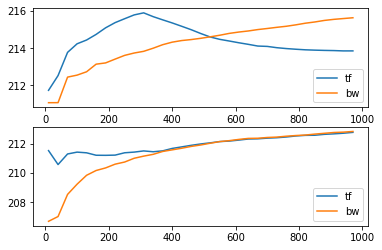

In [27]:
# Ваш код здесь
%matplotlib inline  
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1)
for metric in ["euclidean", "cosine"]:
    rezult_tf_y = []
    rezult_bw_y = []
    rezult_x = []
    for n_neighbors in range(10, 1000, 30):
        nn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute', metric=metric)
        nn.fit(tf_word_X_train)
        distances, indices = nn.kneighbors(tf_word_X_test, n_neighbors)
        word_y_predict = np.take(word_y_train, indices).sum(axis=1) / n_neighbors
        rezult_tf_y.append(RMSE(word_y_predict, word_y_test))
        
        nn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute', metric=metric)
        nn.fit(bw_word_X_train)
        distances, indices = nn.kneighbors(bw_word_X_test, n_neighbors)
        word_y_predict = np.take(word_y_train, indices).sum(axis=1) / n_neighbors
        rezult_bw_y.append(RMSE(word_y_predict, word_y_test))
        
        rezult_x.append(n_neighbors)
    axe = None
    if metric == "euclidean":
        axe = ax1
    else:
        axe = ax2
    axe.plot(rezult_x, rezult_tf_y, label="tf")
    axe.plot(rezult_x, rezult_bw_y, label="bw")
    axe.legend()
plt.show()

<b>3.2 (1 балл)</b> Используя все доступные признаки, решите задачу регрессии. Для категориальных и текстовых признаков выберите лучшие преобразования. Повлияло ли добавление количественного признака на метрику качества?

In [28]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,target
0,2539,Clean & quiet apt home by the park,2787,John,1,108,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,2,127,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,94,40.80902,-73.94190,1,150,3,0,2000-01-01,0.00,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,41,40.68514,-73.95976,0,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,61,40.79851,-73.94399,0,80,10,9,2018-11-19,0.10,1,0,0


In [29]:
# Ваш код здесь
from scipy.sparse import csr_matrix
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']), data[['price']],
                                                    test_size=0.3, random_state=241)

n_neighbors = 100

y_test = [x[0] for x in y_test.to_numpy()]
y_train = [x[0] for x in y_train.to_numpy()]

# transform_data = data.copy(deep=True)
value_text_data_test = csr_matrix(X_test.drop(columns=["name", "host_name", "last_review", "neighbourhood_group", "neighbourhood", "room_type"]).values)
value_text_data_train = csr_matrix(X_train.drop(columns=["name", "host_name", "last_review", "neighbourhood_group", "neighbourhood", "room_type"]).values)

transform = counters(data)
for n, c in zip(["neighbourhood_group", "neighbourhood", "room_type"], transform):
    X_train[n] = [c[x] for x in X_train[n]]
    X_test[n] = [c[x] for x in X_test[n]]

ketegorial_text_data_train = csr_matrix(X_train[["neighbourhood_group", "neighbourhood", "room_type"]].values)
ketegorial_text_data_test = csr_matrix(X_test[["neighbourhood_group", "neighbourhood", "room_type"]].values)

X_train[['name', 'host_name']] = del_stop_words(X_train)
X_test[['name', 'host_name']] = del_stop_words(X_test)

tf_transformer_name = TfidfVectorizer(use_idf=False)
tf_transformer_host_name = TfidfVectorizer(use_idf=False)
tf_transformer_name.fit(data.name)
tf_transformer_host_name.fit(data.host_name)

text_data_test = sparse_hstack(([tf_transformer_name.transform(X_test.name), tf_transformer_host_name.transform(X_test.host_name)]))
text_data_train = sparse_hstack(([tf_transformer_name.transform(X_train.name), tf_transformer_host_name.transform(X_train.host_name)]))

features_test = sparse_hstack(([text_data_test, value_text_data_test, ketegorial_text_data_test]))
features_train = sparse_hstack(([text_data_train, value_text_data_train, ketegorial_text_data_train]))

nn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute', metric="euclidean")
nn.fit(features_train)
distances, indices = nn.kneighbors(features_test, n_neighbors)
y_predict = (np.take(y_train, indices)).sum(axis=1) / n_neighbors
print(RMSE(y_predict, y_test))


# X_train, X_test = fold_counters(data)
# X_train[['name', 'host_name']] = del_stop_word(X_train)
# X_test[['name', 'host_name']] = del_stop_word(X_test)
# y_train = X_train["price"]
# y_test = X_test["price"]
# X_train.drop(["price"], axis=1)
# X_test.drop(["price"], axis=1)


# not_text_data = csr_matrix(transform_data.drop(columns=["name", "host_name", ]).values)

# print(X_train, X_test)

C:\Users\Lev\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


219.60634179866196


219.606341798662

## Часть 4: Выводы


# Ваши выводы здесь (ノ°∀°)ノ⌒･*:.｡. .｡.:*･゜ﾟ･*☆
Обучение кастомных метрик на knn это просто что-то с чем-то. 2-4 часа для одного набора параметра. Поэтому пришлось результаты писать в markdown. Учитывая что на стандартных реализациях просчет происходит не больше пары минут. Учитывая что юпитер при простое просто вырубается было весело видеть что несколько часов ожидания ничего не дали. То что шаблон пришлось переписывать думаю и так известно. 

# По заданию
1. Существует множество способов закодировать категориальные и текстовые признаки. Какие-то из них работают лучше чем другие
2. Увеличение колличества соседей не обязательно ведет к улучшению качества
3. Возникают сложности когда появляется признак в test, которого небыло в train
4. Дополнительная информация в виде категориальных и текстовых признаков улучшает качество